<h1> Introducing Graphs  </h1>

In [47]:
import networkx as nx
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv') 


In [4]:
edgelist.head(10)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0
5,o_rs,y_rs,rs,0.12,red,0
6,y_rs,rs_end_south,rs,0.39,red,0
7,rc_end_north,v_rc,rc,0.70,red,0
8,v_rc,b_rc,rc,0.04,red,0
9,b_rc,g_rc,rc,0.15,red,0


In [5]:
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [6]:
nodelist.head(10)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771
5,b_gy2,2000,983
6,b_o,2039,1012
7,b_rc,1311,979
8,b_rd,268,1744
9,b_rd_dupe,268,1744


In [27]:
graph = nx.Graph()

In [28]:
for idx, row in edgelist.iterrows():
    graph.add_edge(row[0], row[1], **row[2:].to_dict())

In [40]:
list(graph.edges(data=True))[:10]

[('rs_end_north',
  'v_rs',
  {'color': 'red', 'distance': 0.3, 'estimate': 0, 'trail': 'rs'}),
 ('v_rs',
  'b_rs',
  {'color': 'red', 'distance': 0.21, 'estimate': 0, 'trail': 'rs'}),
 ('v_rs',
  'v_bv',
  {'color': 'violet', 'distance': 0.52, 'estimate': 0, 'trail': 'v'}),
 ('v_rs',
  'v_end_east',
  {'color': 'violet', 'distance': 0.54, 'estimate': 0, 'trail': 'v'}),
 ('b_rs',
  'g_rs',
  {'color': 'red', 'distance': 0.11, 'estimate': 0, 'trail': 'rs'}),
 ('b_rs',
  'b_bv',
  {'color': 'blue', 'distance': 0.43, 'estimate': 0, 'trail': 'b'}),
 ('b_rs',
  'b_g',
  {'color': 'blue', 'distance': 0.07, 'estimate': 0, 'trail': 'b'}),
 ('g_rs',
  'w_rs',
  {'color': 'red', 'distance': 0.18, 'estimate': 0, 'trail': 'rs'}),
 ('g_rs',
  'g_rc',
  {'color': 'green', 'distance': 0.45, 'estimate': 0, 'trail': 'g'}),
 ('g_rs',
  'b_g',
  {'color': 'green', 'distance': 0.05, 'estimate': 1, 'trail': 'g'})]

In [31]:
for idx, row in nodelist.iterrows():
    nx.set_node_attributes(graph, {row[0] : row[1:].to_dict()})

In [41]:
np.array(graph.nodes(data=True))[:10]

array([['rs_end_north', {'X': 1772, 'Y': 172}],
       ['v_rs', {'X': 1793, 'Y': 484}],
       ['b_rs', {'X': 1747, 'Y': 700}],
       ['g_rs', {'X': 1676, 'Y': 775}],
       ['w_rs', {'X': 1646, 'Y': 947}],
       ['o_rs', {'X': 1724, 'Y': 1148}],
       ['y_rs', {'X': 1805, 'Y': 1246}],
       ['rs_end_south', {'X': 1865, 'Y': 1598}],
       ['rc_end_north', {'X': 867, 'Y': 618}],
       ['v_rc', {'X': 1288, 'Y': 934}]], dtype=object)

In [43]:
print('# of edges: {}'.format(graph.number_of_edges()))
print('# of nodes: {}'.format(graph.number_of_nodes()))

# of edges: 123
# of nodes: 77


In [44]:
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in graph.nodes(data=True)}

In [45]:
edge_colors = [e[2]['color'] for e in list(graph.edges(data=True))]

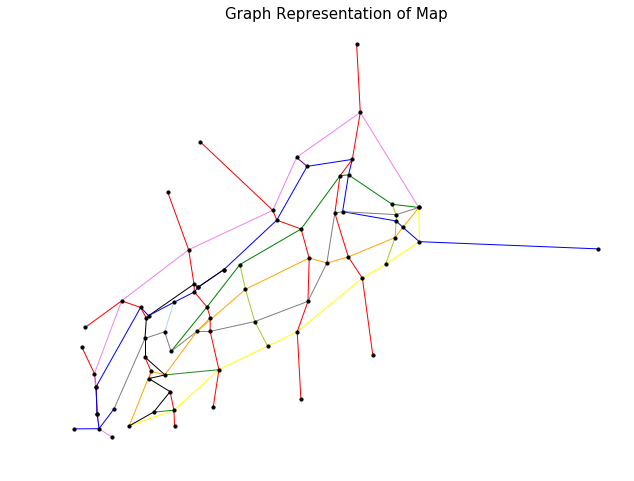

In [49]:
plt.figure(figsize=(8, 6))
nx.draw(graph, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('Graph Representation of Map', size=15)
plt.show()